In [14]:
import json
import requests
import seaborn as sns
import pandas as pd

In [2]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'


In [3]:
response = requests.get(endpoint)


In [4]:
##check for good response
response


<Response [200]>

In [5]:
print(response.text)

[{"month_name":"January","year":"2014","query_count":"223","query_text":"ebid"}
,{"month_name":"January","year":"2014","query_count":"112","query_text":"property maps"}
,{"month_name":"January","year":"2014","query_count":"97","query_text":"maps"}
,{"month_name":"January","year":"2014","query_count":"90","query_text":"property tax"}
,{"month_name":"January","year":"2014","query_count":"76","query_text":"jobs"}
,{"month_name":"January","year":"2014","query_count":"75","query_text":"employment"}
,{"month_name":"January","year":"2014","query_count":"73","query_text":"human resources"}
,{"month_name":"January","year":"2014","query_count":"62","query_text":"police"}
,{"month_name":"January","year":"2014","query_count":"61","query_text":"criminal court clerk"}
,{"month_name":"January","year":"2014","query_count":"53","query_text":"media releases"}
,{"month_name":"January","year":"2014","query_count":"50","query_text":"property taxes"}
,{"month_name":"January","year":"2014","query_count":"49"

In [6]:
#dictionary

res = response.json()

In [7]:
with open('keys.json') as fi:
    credentials = json.load(fi)

FileNotFoundError: [Errno 2] No such file or directory: 'keys.json'

In [ ]:
api_key = credentials['api_key']

1. Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches? 

In [ ]:
params = {
"year" : "2016",
"Query Text" : "fire"
}

In [ ]:
response = requests.get(endpoint, params = params)


In [ ]:
res = response.json()
res

In [ ]:
fire_months_df = pd.DataFrame(res)
fire_months_df

In [ ]:
highest_month = fire_months_df[fire_months_df['query_count'] == fire_months_df['query_count'].max()]
highest_month

2. Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?  


In [ ]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count>100&$select=month_name,month,year,query_count,query_text&$group=month_name,month,year,query_count,query_text'

response = requests.get(endpoint)

if response.status_code == 200:
    data = response.json()
    count = len(data)
    print(f"The query was run more than 100 times in a month {count} times.")
else:
    print("Failed to find data.")

In [ ]:
response


In [ ]:
res = response.json()
res

3. Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?

In [27]:

# API endpoint
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

# query parameters
params = {
    '$where': 'query_count>100 AND query_text="codes"',
    '$select': 'COUNT(*)'
}

# API request
response = requests.get(endpoint, params=params)

# Check if the request was successful
# In HTTP, the status code 200 means "OK", which indicates that the server has successfully processed the request and returned a response.
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
    # Check if the response contains any records
    if data:
        # Get the count of matching records
        count = data[0]['COUNT']
        print(f'The term "codes" was searched more than 100 times in a month {count} times.')
    else:
        print('No matching records found.')
else:
    # if tere is a request error
    print(f'API request failed with status code {response.status_code}.')
    print(response.text)

The term "codes" was searched more than 100 times in a month 56 times.


4. Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [25]:
df4 = pd.read_json('https://data.nashville.gov/resource/fuaa-r5cm.json?')
maps_df = df4.query("query_text == 'maps'")
maps_df['month_year'] = maps_df.apply(lambda row: row['month_name'] + ' ' + str(row['year']), axis=1)
print(maps_df.head())

    month_name  year  query_count query_text     month_year
2      January  2014           97       maps   January 2014
503   February  2014          140       maps  February 2014


C:\Users\scost\AppData\Local\Temp\ipykernel_7724\1300554135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maps_df['month_year'] = maps_df.apply(lambda row: row['month_name'] + ' ' + str(row['year']), axis=1)


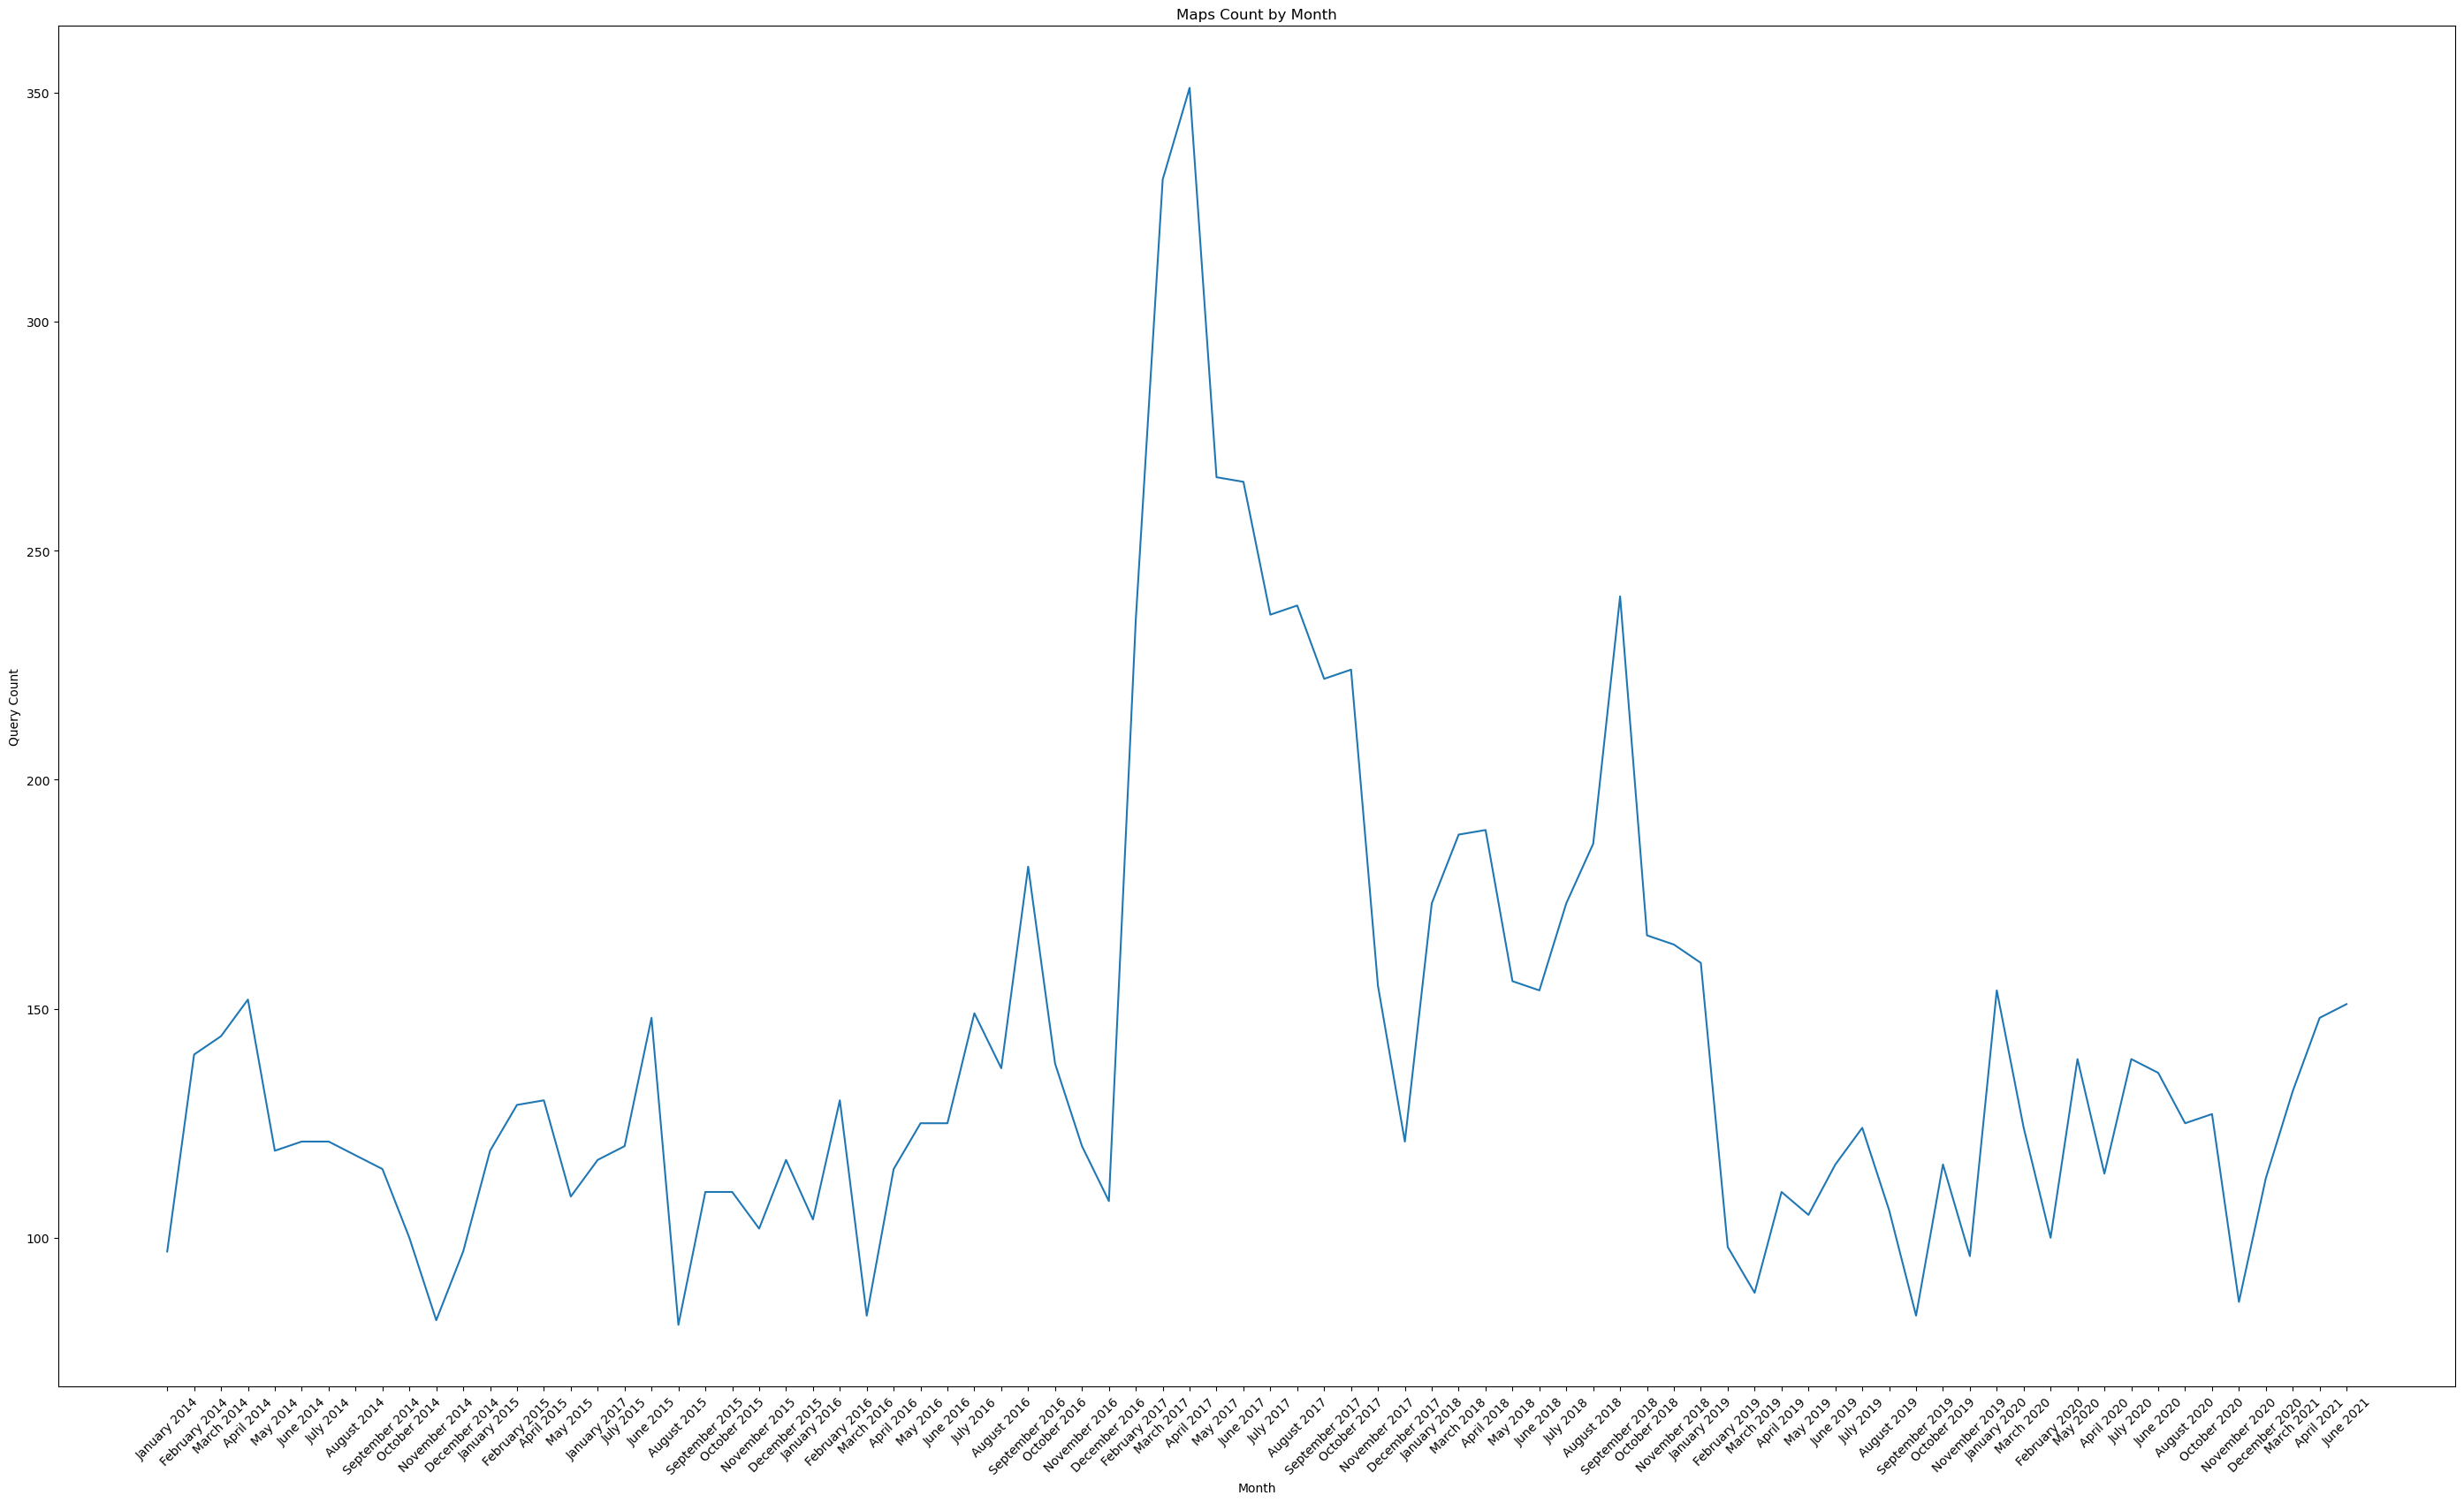

In [26]:

plt.figure(figsize=(35, 20))
sns.lineplot(data=maps_query_df, x='month_year', y='query_count')
plt.title('Maps Count by Month')
plt.xlabel('Month')
plt.ylabel('Query Count')
# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.show()